**This will be comperhansive Visual Odomotery notebook**

# Data Acqusation from KITTI

In [ ]:
#20GB Kıttı grayscale data ~20min
!wget https://s3.eu-central-1.amazonaws.com/avg-kitti/data_odometry_gray.zip

--2022-12-10 11:14:19--  https://s3.eu-central-1.amazonaws.com/avg-kitti/data_odometry_gray.zip
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 52.219.169.209
Connecting to s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)|52.219.169.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23166524501 (22G) [application/zip]
Saving to: ‘data_odometry_gray.zip’

data_odometry_gray. 100%[===================>]  21.58G  18.9MB/s    in 19m 26s 

2022-12-10 11:33:46 (19.0 MB/s) - ‘data_odometry_gray.zip’ saved [23166524501/23166524501]



In [ ]:
#Ground Truth 4Mb
!wget https://s3.eu-central-1.amazonaws.com/avg-kitti/data_odometry_poses.zip

--2022-12-10 11:33:53--  https://s3.eu-central-1.amazonaws.com/avg-kitti/data_odometry_poses.zip
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 52.219.75.139
Connecting to s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)|52.219.75.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1309620 (1.2M) [application/zip]
Saving to: ‘data_odometry_poses.zip’

data_odometry_poses 100%[===================>]   1.25M  1.41MB/s    in 0.9s    

2022-12-10 11:33:54 (1.41 MB/s) - ‘data_odometry_poses.zip’ saved [1309620/1309620]



In [ ]:
!unzip /content/data_odometry_gray.zip

Streaming output truncated to the last 5000 lines.
 extracting: dataset/sequences/00/image_1/004358.png  
 extracting: dataset/sequences/00/image_1/004005.png  
 extracting: dataset/sequences/00/image_1/002775.png  
 extracting: dataset/sequences/00/image_1/000549.png  
 extracting: dataset/sequences/00/image_1/001014.png  
 extracting: dataset/sequences/00/image_1/004393.png  
 extracting: dataset/sequences/00/image_1/002335.png  
 extracting: dataset/sequences/00/image_1/002929.png  
 extracting: dataset/sequences/00/image_1/002347.png  
 extracting: dataset/sequences/00/image_1/002082.png  
 extracting: dataset/sequences/00/image_1/003573.png  
 extracting: dataset/sequences/00/image_1/004448.png  
 extracting: dataset/sequences/00/image_1/000939.png  
 extracting: dataset/sequences/00/image_1/003189.png  
 extracting: dataset/sequences/00/image_1/001443.png  
 extracting: dataset/sequences/00/image_1/004531.png  
 extracting: dataset/sequences/00/image_1/000374.png  
 extracting: d

In [ ]:
!unzip /content/data_odometry_poses.zip

Archive:  /content/data_odometry_poses.zip
   creating: dataset/poses/
  inflating: dataset/poses/08.txt    
  inflating: dataset/poses/09.txt    
  inflating: dataset/poses/05.txt    
  inflating: dataset/poses/04.txt    
  inflating: dataset/poses/10.txt    
  inflating: dataset/poses/07.txt    
  inflating: dataset/poses/02.txt    
  inflating: dataset/poses/06.txt    
  inflating: dataset/poses/03.txt    
  inflating: dataset/poses/01.txt    
  inflating: dataset/poses/00.txt    


In [ ]:
!wget https://s3.eu-central-1.amazonaws.com/avg-kitti/data_odometry_calib.zip

--2022-12-10 12:12:30--  https://s3.eu-central-1.amazonaws.com/avg-kitti/data_odometry_calib.zip
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 52.219.170.49
Connecting to s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)|52.219.170.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 600238 (586K) [application/zip]
Saving to: ‘data_odometry_calib.zip’

data_odometry_calib 100%[===================>] 586.17K   805KB/s    in 0.7s    

2022-12-10 12:12:32 (805 KB/s) - ‘data_odometry_calib.zip’ saved [600238/600238]



In [ ]:
#Please enter A and replace all because this file is updated version of calibration
!unzip /content/data_odometry_calib.zip

Archive:  /content/data_odometry_calib.zip
replace dataset/sequences/00/calib.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: dataset/sequences/00/calib.txt  
replace dataset/sequences/01/calib.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: yA
 extracting: dataset/sequences/01/calib.txt  
replace dataset/sequences/02/calib.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: dataset/sequences/02/calib.txt  
 extracting: dataset/sequences/03/calib.txt  
 extracting: dataset/sequences/04/calib.txt  
 extracting: dataset/sequences/05/calib.txt  
 extracting: dataset/sequences/06/calib.txt  
 extracting: dataset/sequences/07/calib.txt  
 extracting: dataset/sequences/08/calib.txt  
 extracting: dataset/sequences/09/calib.txt  
 extracting: dataset/sequences/10/calib.txt  
 extracting: dataset/sequences/11/calib.txt  
 extracting: dataset/sequences/12/calib.txt  
 extracting: dataset/sequences/13/calib.txt  
 extracting: dataset/sequences/14/calib.txt  
 extracting: dataset/seque

# Imports

In [ ]:
import cv2
import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re

# Explore Ground Truth

In [ ]:
#explore ground truth data
poses = pd.read_csv('/content/dataset/poses/00.txt', delimiter=' ', header=None)
print('Shape of position dataframe:', poses.shape)
poses.head()

Shape of position dataframe: (4541, 12)


,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,9.043680e-12,2.326809e-11,5.551115e-17,9.043683e-12,1.000000,2.392370e-10,3.330669e-16,2.326810e-11,2.392370e-10,1.000000,-4.440892e-16
1,0.999998,5.272628e-04,-2.066935e-03,-4.690294e-02,-5.296506e-04,0.999999,-1.154865e-03,-2.839928e-02,2.066324e-03,1.155958e-03,0.999997,8.586941e-01
2,0.999991,1.048972e-03,-4.131348e-03,-9.374345e-02,-1.058514e-03,0.999997,-2.308104e-03,-5.676064e-02,4.128913e-03,2.312456e-03,0.999989,1.716275e+00
3,0.999980,1.566466e-03,-6.198571e-03,-1.406429e-01,-1.587952e-03,0.999993,-3.462706e-03,-8.515762e-02,6.193102e-03,3.472479e-03,0.999975,2.574964e+00
4,0.999964,2.078471e-03,-8.263498e-03,-1.874858e-01,-2.116664e-03,0.999987,-4.615826e-03,-1.135202e-01,8.253797e-03,4.633149e-03,0.999955,3.432648e+00


!!! Please note that those values are error derived from binary representation of the numbers. so these small numbers indeed a zero.

There are 4541 number of pose (rows). 12 colmuns respresnts the flattened 3x4 *transformation matrix*. 
**Transformation matrix** : the left stereo camera with respect to the global coordinate frame.                                                             
A 3x4 transfomration matrix contains a 3x3 rotation matrix horizontally stacked with a 3x1 translation vector in the form R|t                                  
**R** :Rotation Matrix                                                    
**t** :Translation vector                                                       


In [ ]:
print('First position:')
first_pose = np.array(poses.iloc[0]).reshape((3,4)).round(2)
first_pose

First position:


array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1., -0.]])

[Transformation 3D space](https://pages.mtu.edu/~shene/COURSES/cs3621/NOTES/geometry/geo-tran.html)

Above link clearly explains what is going on. But breifly


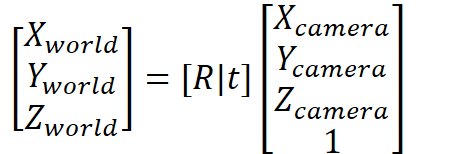

We assumed that camera first position is origin for the world. Camera frame coordinates are dot producted with Transformation Matrix to get **pose**. 

In [ ]:
#Lets create our ground truth transformation matrix.
gt = np.zeros((len(poses), 3, 4))
for i in range(len(poses)):
    gt[i] = np.array(poses.iloc[i]).reshape((3, 4))

We will use homogeneous coordinates to make calulcation suitable for linear algebra. Like [x,y,z,1] 

Lets make an calculation. Lets assume that our camera first position is origin for real world and calculate position from transoframtion matrix by above formula.

In [ ]:
gt[1].dot(np.array([0,0,0,1]))

array([-0.04690294, -0.02839928,  0.8586941 ])

It is clear that our robot move 0.85 meter forward (z direction) and very small movement around X,Y. Which seems reasonable 
hat in the second frame, the camera
was .85 meters in front of where it was in the first frame. As we will see, the camera operates at ~10FPS, which puts this at 8.5m/s, or roughly 19 mph, which sounds right.


lets continue similarly.

In [ ]:
gt[2].dot(np.array([0,0,0,1]))

array([-0.09374345, -0.05676064,  1.716275  ])

It moved further on z axis. This proves that our calcualtion is correct.

Then lets visualize complete trajectory of sequence.

Before that lets clarify a couple of things if it is not udnerstood. Firstly Transformation matrix 3rd columns represents translation. So if we ignore rotation (not roation) means R is identity.



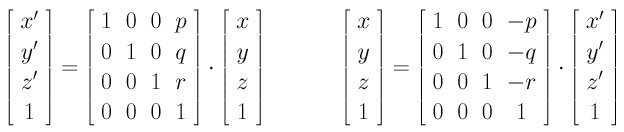 


It means that we are adding a vector <p, q, r>. Therefore movement in 3D can be visuazlize if we assumed that we are not turning on wehere we already are. Lets visualize this to gain insgiht at least how it moving. 

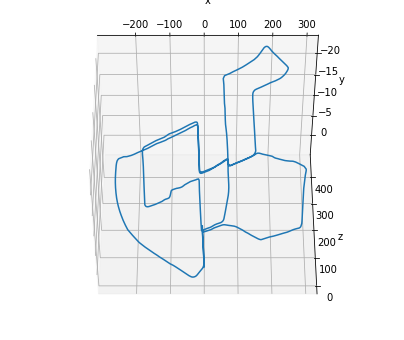

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(gt[:, :, 3][:, 0], gt[:, :, 3][:, 1], gt[:, :, 3][:, 2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=-40, azim=270)

It seems that we move around and come back teh same point. What a great tour. 

# Photo exploration

Now its time see what we have as camera output.

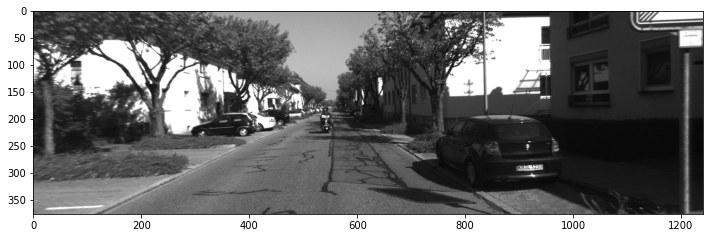

In [ ]:
sample_img = cv2.imread('/content/dataset/sequences/00/image_0/000000.png')
plt.figure(figsize=(12,6))
plt.imshow(sample_img)

Nice sample. Now go and list all our images in sequnce 00

In [ ]:
left_image_files = os.listdir('/content/dataset/sequences/00/image_0')
left_image_files[:5]

['001638.png', '004471.png', '001181.png', '000538.png', '002779.png']

In [ ]:
len(left_image_files)

4541

Thankfully no missing data

Since our first pose is 0,0,0 we will do all our calculation according to first camera frame. This cause matching between world origin camera origin and first frame.

BUt first now lets explore what is the time

In [ ]:
times = pd.read_csv('/content/dataset/sequences/00/times.txt', delimiter=' ', header=None)
times.head()

,0
0,0.000000
1,0.103736
2,0.207338
3,0.311075
4,0.414692


10 fps as expected. 

# Sensor Calibration

In [ ]:
calib = pd.read_csv('/content/dataset/sequences/00/calib.txt', delimiter=' ', header=None, index_col=0)
calib

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
P0:,718.856000,0.000000,607.192800,0.000000,0.000000,718.856000,185.215700,0.000000,0.000000,0.000000,1.000000,0.000000
P1:,718.856000,0.000000,607.192800,-386.144800,0.000000,718.856000,185.215700,0.000000,0.000000,0.000000,1.000000,0.000000
P2:,718.856000,0.000000,607.192800,45.382250,0.000000,718.856000,185.215700,-0.113089,0.000000,0.000000,1.000000,0.003780
P3:,718.856000,0.000000,607.192800,-337.287700,0.000000,718.856000,185.215700,2.369057,0.000000,0.000000,1.000000,0.004915
Tr:,0.000428,-0.999967,-0.008084,-0.011985,-0.007211,0.008081,-0.999941,-0.054040,0.999974,0.000486,-0.007207,-0.292197


**Note** : Realised that there is again 12 row which is similar to transformation matrix. However these are called **projection matrix**. Strutcure is the same with transformation matrix. We will refer them P from now on.  <br>
There is 5 rows. P corresponds to each camare in teh system. Last one for lidar which I will not go trough. 

<br> Lets look a sample

In [ ]:
P0 = np.array(calib.loc['P0:']).reshape((3,4))
P0

array([[718.856 ,   0.    , 607.1928,   0.    ],
       [  0.    , 718.856 , 185.2157,   0.    ],
       [  0.    ,   0.    ,   1.    ,   0.    ]])

These matrices contain intrinsic information about the camera's focal length and optical center. These values will be important later on. <br>
They also contain tranformation information which relates each camera's coordinate frame to the global coordinate frame.
<br>
P0: left gray scale <br>
P1: right gray scale <br>
P2: left color scale <br>
P0: left color scale <br>

Since our translation in the P0 is [0,0,0], our global coordiante center is also left gray scale camera. 

A projection matrix takes 3D coordinates in the global coordinate frame and projects them onto the image plane of the camera through the following formula. 

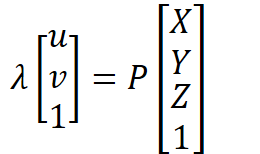

Where λ is the depth to the point along the Z axis from the camera, that is, the Z value AFTER the transformation R|t has been applied to the 3D point to bring it into the camera's coordinate frame. <br>
Real --> camera --> image 

**!!!!** A projection matrix (P) is the dot product of the intrinsic and extrinsic matrices of a camera. The intrinsic matrix (k) contains the focal length and optical center parameters, and the extrinsic matrix (R|t) contains the pose of the camera in the same form we saw earlier with the ground truth poses of the car: a 3x3 rotation matrix horizontally stacked with a 3x1 translation vector. We can see the formula for P below:

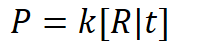

Explicit description of the process of projecting a 3D point in any coordinate frame into the pixel coordinate frame of the camera:

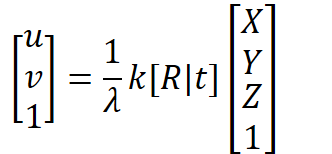

**Normally, a camera's projection matrix take a 3D point in a global coordinate frame and projects it onto pixel coordinates on THAT camera's image frame.**

However according to data description it is not normal versin instead it is rectified version. "Rectified projection matrices are the opposite, and are designed to map points each camera's coordinate frame onto one single image plane: that of the left camera. This means they are going in the opposite direction, as these matrices are taking 3D points from the coordinate frame of the camera they are associated with, and projecting them onto the image plane of the left camera. If phrased in terms of normal projection matrix logic, P0 through P1 are basically 4 different projection matrices for the same (left grayscale) camera, considering 4 different "global" coordinate frames for each one of the cameras." 

Lets now look KITTI car:

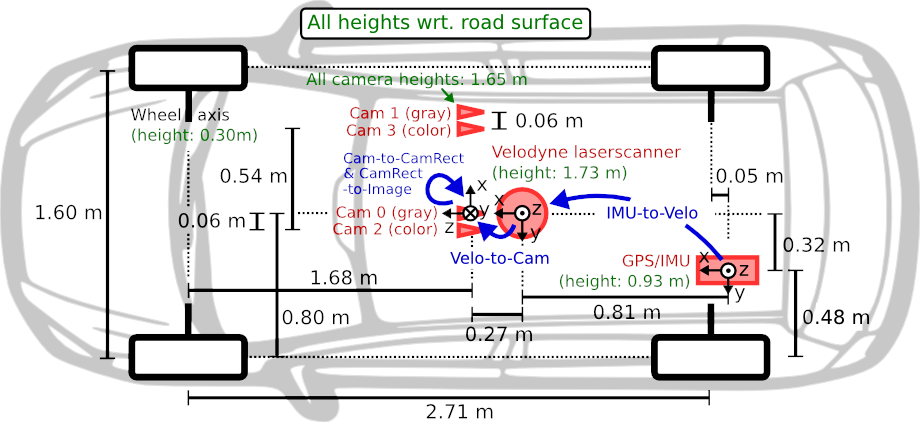

We can see from the schematic that there are two stereo pairs of cameras, one set of grayscale and one set of RGB, and that the baseline (distance between right and left) is 0.54 meters on the X axis of the left grayscale camera.

In [ ]:
#Below I used cv2 decompostion method 
P1 = np.array(calib.loc['P1:']).reshape((3,4))
k1, r1, t1, _, _, _, _ = cv2.decomposeProjectionMatrix(P1)
t1 = t1 / t1[3]
print('Intrinsic Matrix:')
print(k1)
print('Rotation Matrix:')
print(r1)
print('Translation Vector:')
print(t1.round(4))

Intrinsic Matrix:
[[718.856    0.     607.1928]
 [  0.     718.856  185.2157]
 [  0.       0.       1.    ]]
Rotation Matrix:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Translation Vector:
[[ 0.5372]
 [ 0.    ]
 [-0.    ]
 [ 1.    ]]


In [ ]:
# Lets make right grayscale camera projection.
# In this case, let's see what we get if we transform the origin of the global coordinate
# frame (the origin of the left grayscale camera) using the tranformation/extrinsic matrix
# we got from this projection matrix. According to the schematic, we should expect it to be
# 0.54m to the left (X = -0.54)


Rt = np.hstack([r1, t1[:3]])
# Now to consider transform the origin of the global frame (0, 0, 0, 1) left gray scale camera place. 
origin = np.array([0, 0, 0, 1])
Rt.dot(origin).round(4).reshape(-1,1)

array([[ 0.5372],
       [ 0.    ],
       [-0.    ]])

If the projection matrices provided were standard per-camera projection matrices, we would expect the extrinsic matrix to take a point from the global coordinate frame and tranform it into the frame of the camera. For example, if we were to take the origin of the global coordinate frame (the origin of the left grayscale camera) and translate it into the coordinate frame of the right grayscale camera, we would expect to see an X coordinate of -0.54, since the left camera's origin is 0.54 meters to the left of the right grayscale camera's origin. <br>
However as it can be seen from above result that its no -0.54 instead +0.54.


This tells us that this projection matrix is **NOT** actually referring to
the right camera, it is referring to the left camera, and treating the origin of the right camera as the global coordinate frame. This is because it is a rectified projection matrix for a stereo rig, which is intended to project points from the coordinate frames of multiple cameras onto the SAME image plane, rather than the coordinates from one coordinate frame onto the image planes of multiple cameras.

**Each rectified projection matrix will take (X, Y, Z, 1) homogeneous coordinates of 3D points in the associated sensor's coordinate frame and translates them to pixel locations (u, v, 1) on the image plane of the left grayscale camera.**

Lets turns them into normal projection

In [ ]:
T_homogeneous = np.vstack([Rt, np.array([0, 0, 0, 1])])
T_hom_inv = np.linalg.inv(T_homogeneous)
print('Homogeneous transformation matrix:')
print(T_homogeneous.round(4))
print('Inverted homogeneous transformation matrix:')
print(T_hom_inv.round(4))


Homogeneous transformation matrix:
[[ 1.      0.      0.      0.5372]
 [ 0.      1.      0.      0.    ]
 [ 0.      0.      1.     -0.    ]
 [ 0.      0.      0.      1.    ]]
Inverted homogeneous transformation matrix:
[[ 1.      0.      0.     -0.5372]
 [ 0.      1.      0.     -0.    ]
 [ 0.      0.      1.      0.    ]
 [ 0.      0.      0.      1.    ]]


In [ ]:
# lets make an sample caluclation

#a point in left gray camera frame.
some_point = np.array([1, 2, 3, 1]).reshape(-1,1)
# Let's get the depth of this point from the left camera by tranforming it into the coordinate
# frame of the left camera, and taking the Z value. We can do the transformation using the
# Rt matrix we stacked a moment ago.
# a random 14th ground truth pose 
transformed_point = gt[14].dot(some_point) #transformation @ reference point.
depth_from_cam = transformed_point[2] #lamda

print('Original point:\n', some_point)
print('Transformed point:\n', transformed_point.round(4))
print('Depth from camera:\n', depth_from_cam.round(4))


Original point:
 [[1]
 [2]
 [3]
 [1]]
Transformed point:
 [[ 0.2706]
 [ 1.5461]
 [15.0755]]
Depth from camera:
 [15.0755]


In [ ]:
# Multiplying by intrinsic matrix k, then dividing by depth
pixel_coordinates1 = k1.dot(transformed_point) / depth_from_cam
print('Pixel Coordinates 1st way:', pixel_coordinates1.T)

Pixel Coordinates 1st way: [[620.09802465 258.93763336   1.        ]]


**NORMALIZED PIXEL**

"normalizing" the pixel coordinates by multiplying
them by the inverse of the intrinsic matrix k, which brings us back into unitless values, as we take pixel measurements and multiply them by the inverse of pixel measurements. This can be useful for mathematical reason but **not a necessity**.

In [ ]:
normalized_coordinates = np.linalg.inv(k1).dot(pixel_coordinates1)
print('Normalized Coordinates:', normalized_coordinates.T)

Normalized Coordinates: [[0.01795245 0.10255452 1.        ]]


Camera to global frame

In [ ]:
restored_3D = normalized_coordinates.T * depth_from_cam
restored_3D.round(4)
T_homogeneous = np.vstack([gt[14], np.array([0, 0, 0, 1])])
T_hom_inv = np.linalg.inv(T_homogeneous)
restored_3D_hom = np.append(restored_3D, 1)
T_hom_inv.dot(restored_3D_hom)

array([1., 2., 3., 1.])

**FOCAL POINTS AND OPTICAL LENGTH**

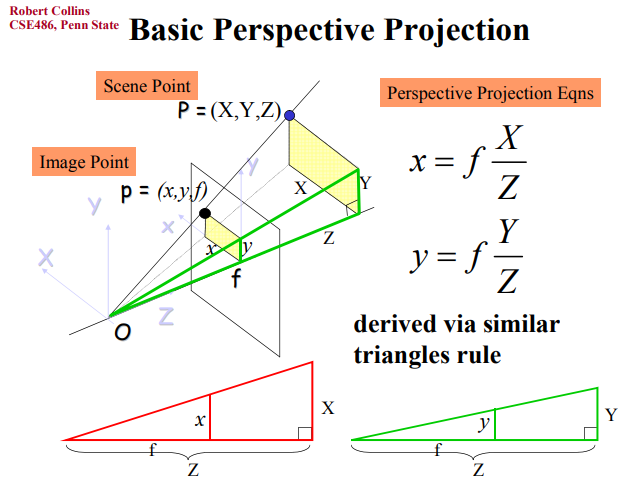

f is the focal point. <br>
The secret is that the formula to calculate the 2D projection in pixel coordinates from a 3D coordinate in the same coordinate frame as the camera is actually as follows:

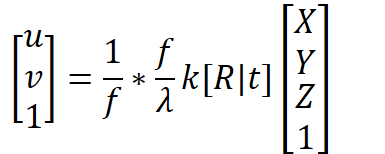 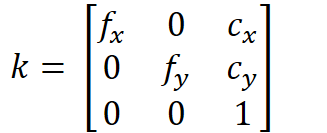

**Above formla boils down the previous one as well** 

The remaining two values in the intrinsic matrix, c_x and c_y, represent the optical center of the image, that is, where rays of light coming directly down the Z axis of the camera coordinate frame will intersect the pixel plane. While one might want to assume that this would be at the center of the camera's sensor, it is often the case that the sensor is slightly off of center with the lens, so this adjustment in the intrinsic matrix ensures that we are mapping incoming light rays to the proper pixel coordinate they will be at when they hit the camera sensor.

In [ ]:
cx = k1[0,2]
cy = k1[1,2]
print('Actual center of image (x, y):', (sample_img.shape[1]/2, sample_img.shape[0]/2))
print('Optical center of image (cx, cy)', (cx, cy))

Actual center of image (x, y): (620.5, 188.0)
Optical center of image (cx, cy) (607.1928, 185.2157)


**information is important, because if we had assumed that light coming down the camera's Z axis hit the center of the image plane, we would have been projecting points in the world to the wrong parts of the image.**

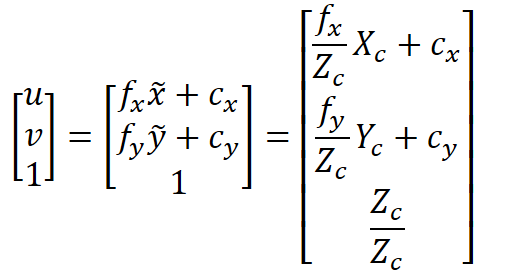

# Dataset Handler

In [ ]:
class Dataset_Handler():
    def __init__(self, sequence,  progress_bar=True, low_memory=True):
        
        
        
        # This will tell odometry functin how to access data from this object
        self.low_memory = low_memory
        
        # Set file paths and get ground truth poses
        self.seq_dir = '/content/dataset/sequences/{}/'.format(sequence)
        self.poses_dir = '/content/dataset/poses/{}.txt'.format(sequence)
        poses = pd.read_csv(self.poses_dir, delimiter=' ', header=None)
        
        # Get names of files to iterate through
        self.left_image_files = os.listdir(self.seq_dir + 'image_0')
        self.right_image_files = os.listdir(self.seq_dir + 'image_1')
        self.left_image_files.sort(key=lambda f: int(re.sub('\D', '', f)))
        self.right_image_files.sort(key=lambda f: int(re.sub('\D', '', f)))
        self.num_frames = len(self.left_image_files)
        
        
        # Get calibration details for scene
        # P0 and P1 are Grayscale cams, P2 and P3 are RGB cams
        calib = pd.read_csv(self.seq_dir + 'calib.txt', delimiter=' ', header=None, index_col=0)
        self.P0 = np.array(calib.loc['P0:']).reshape((3,4))
        self.P1 = np.array(calib.loc['P1:']).reshape((3,4))
        self.P2 = np.array(calib.loc['P2:']).reshape((3,4))
        self.P3 = np.array(calib.loc['P3:']).reshape((3,4))
        # This is the transformation matrix for LIDAR
        self.Tr = np.array(calib.loc['Tr:']).reshape((3,4))
        
        # Get times and ground truth poses
        self.times = np.array(pd.read_csv(self.seq_dir + 'times.txt', 
                                          delimiter=' ', 
                                          header=None))
        self.gt = np.zeros((len(poses), 3, 4))
        for i in range(len(poses)):
            self.gt[i] = np.array(poses.iloc[i]).reshape((3, 4))
        
        # Get images and lidar loaded
        if self.low_memory:
            # Will use generators to provide data sequentially to save RAM
            # Use class method to set up generators
            self.reset_frames()
            # Store original frame to memory for testing functions
            self.first_image_left = cv2.imread(self.seq_dir + 'image_0/' 
                                               + self.left_image_files[0], 0)
            self.first_image_right = cv2.imread(self.seq_dir + 'image_1/' 
                                               + self.right_image_files[0], 0)
            self.second_image_left = cv2.imread(self.seq_dir + 'image_0/' 
                                               + self.left_image_files[1], 0)
            
            self.imheight = self.first_image_left.shape[0]
            self.imwidth = self.first_image_left.shape[1]
            
        else:
            # If RAM is not a concern (>32GB), pass low_memory=False
            if progress_bar:
                import progressbar
                bar = progressbar.ProgressBar(max_value=self.num_frames)
            self.images_left = []
            self.images_right = []
            self.pointclouds = []
            for i, name_left in enumerate(self.left_image_files):
                name_right = self.right_image_files[i]
                self.images_left.append(cv2.imread(self.seq_dir + 'image_0/' + name_left))
                self.images_right.append(cv2.imread(self.seq_dir + 'image_1/' + name_right))
                if progress_bar:
                    bar.update(i+1)
                
            self.imheight = self.images_left[0].shape[0]
            self.imwidth = self.images_left[0].shape[1]
            # Keep consistent instance variable names as when using low_memory
            self.first_image_left = self.images_left[0]
            self.first_image_right = self.images_right[0]
            self.second_image_left = self.images_left[1]
            
            
    def reset_frames(self):
        # Resets all generators to the first frame of the sequence
        self.images_left = (cv2.imread(self.seq_dir + 'image_0/' + name_left, 0)
                            for name_left in self.left_image_files)
        self.images_right = (cv2.imread(self.seq_dir + 'image_1/' + name_right, 0)
                            for name_right in self.right_image_files)
        
        pass


In [ ]:
handler = Dataset_Handler('00')

#Streo Based Depth

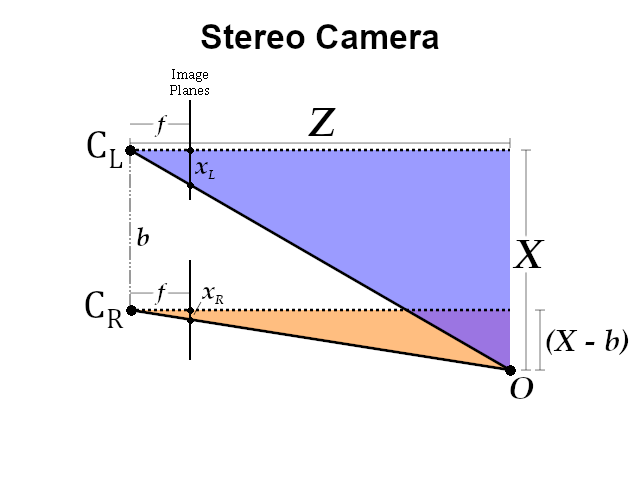

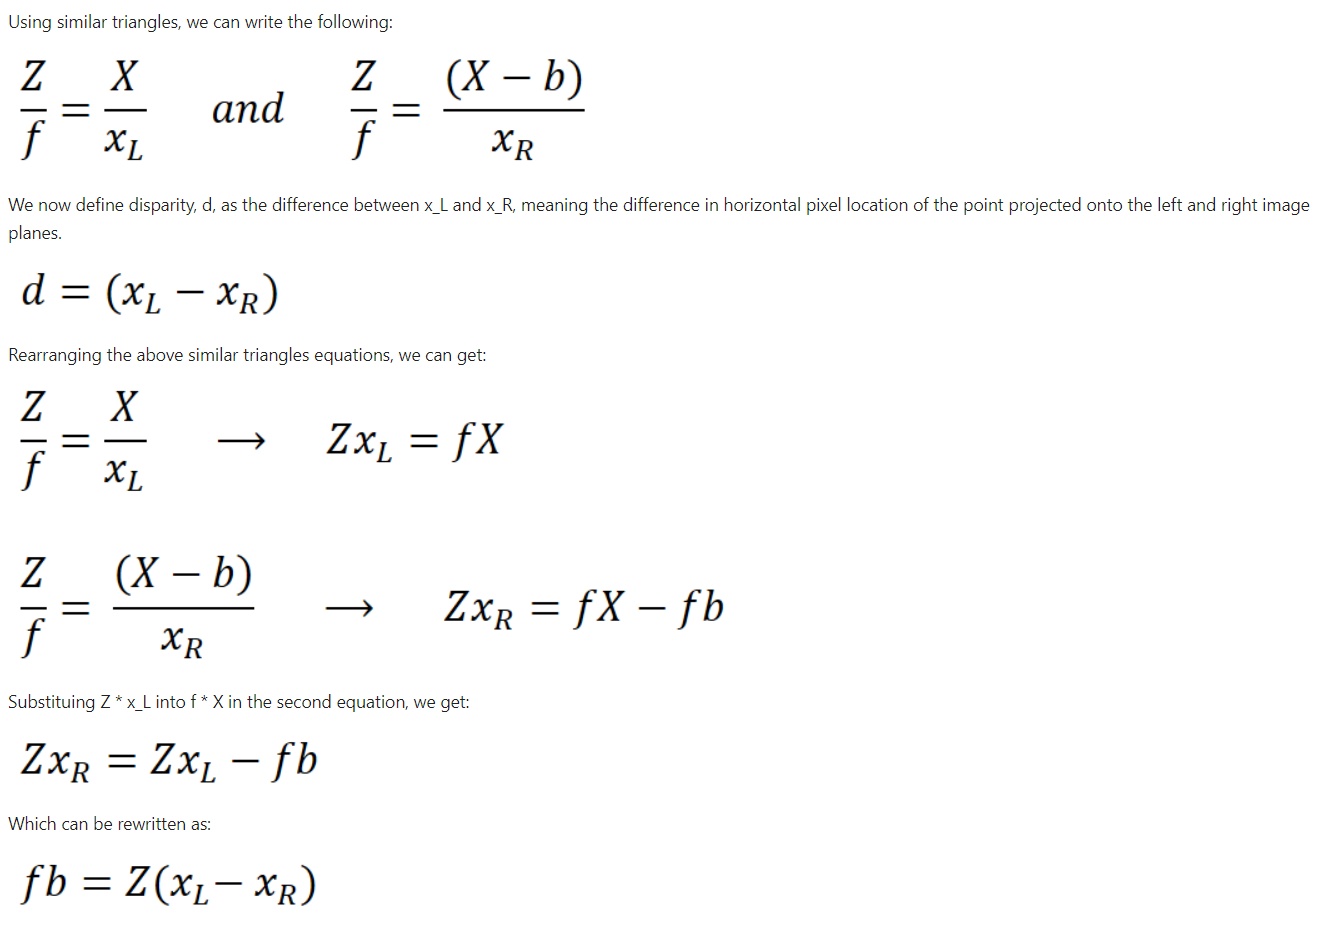

Over all <br>
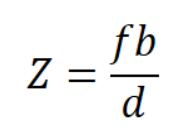

b already found as 0.54m
<br> f as 718.856px

**Disparity calculator**

In [ ]:
def compute_left_disparity_map(img_left, img_right, matcher='bm', rgb=False, verbose=False):
    '''
    Takes a left and right stereo pair of images and computes the disparity map for the left
    image. Pass rgb=True if the images are RGB.
    
    Arguments:
    img_left -- image from left camera
    img_right -- image from right camera
    
    Optional Arguments:
    matcher -- (str) can be 'bm' for StereoBM or 'sgbm' for StereoSGBM matching
    rgb -- (bool) set to True if passing RGB images as input
    verbose -- (bool) set to True to report matching type and time to compute
    
    Returns:
    disp_left -- disparity map for the left camera image
    
    '''
    
    sad_window = 6
    num_disparities = sad_window*16
    block_size = 11
    matcher_name = matcher
    
    if matcher_name == 'bm':
        matcher = cv2.StereoBM_create(numDisparities=num_disparities,
                                      blockSize=block_size
                                     )
        
    elif matcher_name == 'sgbm':
        matcher = cv2.StereoSGBM_create(numDisparities=num_disparities,
                                        minDisparity=0,
                                        blockSize=block_size,
                                        P1 = 8 * 3 * sad_window ** 2,
                                        P2 = 32 * 3 * sad_window ** 2,
                                        mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
                                       )
    if rgb:
        img_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)
        img_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)
    start = datetime.datetime.now()
    disp_left = matcher.compute(img_left, img_right).astype(np.float32)/16
    end = datetime.datetime.now()
    if verbose:
        print(f'Time to compute disparity map using Stereo{matcher_name.upper()}:', end-start)
    
    return disp_left

Time to compute disparity map using StereoBM: 0:00:00.044585


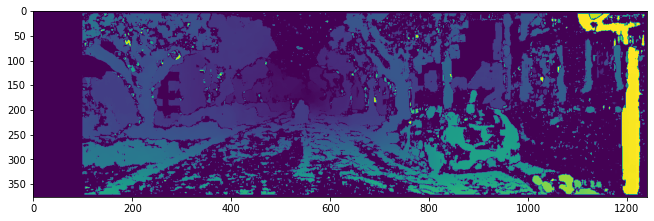

In [ ]:
#BM based disparity calculator
disp = compute_left_disparity_map(handler.first_image_left, 
                                  handler.first_image_right, 
                                  matcher='bm',
                                  verbose=True)
plt.figure(figsize=(11,7))
plt.imshow(disp);


Time to compute disparity map using StereoSGBM: 0:00:00.153801


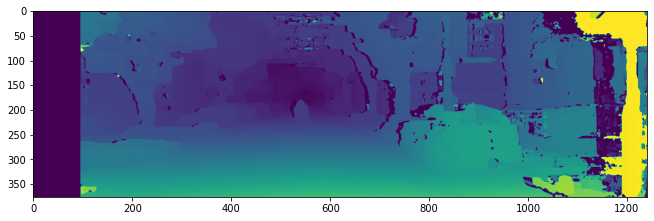

In [ ]:
#SGBM based disparity calculator
disp = compute_left_disparity_map(handler.first_image_left, 
                                  handler.first_image_right, 
                                  matcher='sgbm',
                                  verbose=True)
plt.figure(figsize=(11,7))
plt.imshow(disp);


We can see that there is a gap of the left side of the image where the right camera did not have matching information. This means that we should apply a mask when looking for features to match from one frame to the next so that we can use features which fall in the area of the picture for which we have depth information.

In [ ]:
#For instance
disp[0,0]

-1.0

A mor practical decomposer

In [ ]:
def decompose_projection_matrix(p):
    '''
    Shortcut to use cv2.decomposeProjectionMatrix(), which only returns k, r, t, and divides
    t by the scale, then returns it as a vector with shape (3,) (non-homogeneous)
    
    Arguments:
    p -- projection matrix to be decomposed
    
    Returns:
    k, r, t -- intrinsic matrix, rotation matrix, and 3D translation vector
    
    '''
    k, r, t, _, _, _, _ = cv2.decomposeProjectionMatrix(p)
    t = (t / t[3])[:3]
    
    return k, r, t

**Depth Map Calculation**

In [ ]:
def calc_depth_map(disp_left, k_left, t_left, t_right, rectified=True):
    '''
    Calculate depth map using a disparity map, intrinsic camera matrix, and translation vectors
    from camera extrinsic matrices (to calculate baseline). Note that default behavior is for
    rectified projection matrix for right camera. If using a regular projection matrix, pass
    rectified=False to avoid issues.
    
    Arguments:
    disp_left -- disparity map of left camera
    k_left -- intrinsic matrix for left camera
    t_left -- translation vector for left camera
    t_right -- translation vector for right camera
    
    Optional Arguments:
    rectified -- (bool) set to False if t_right is not from rectified projection matrix
    
    Returns:
    depth_map -- calculated depth map for left camera
    
    '''
    # Get focal length of x axis for left camera
    f = k_left[0][0]
    
    # Calculate baseline of stereo pair
    if rectified:
        b = t_right[0] - t_left[0] 
    else:
        b = t_left[0] - t_right[0]
        
    # Avoid instability and division by zero
    disp_left[disp_left == 0.0] = 0.1
    disp_left[disp_left == -1.0] = 0.1
    
    # Make empty depth map then fill with depth
    depth_map = np.ones(disp_left.shape)
    depth_map = f * b / disp_left
    
    return depth_map


In [ ]:
k_left, r_left, t_left = decompose_projection_matrix(handler.P0)
k_right, r_right, t_right = decompose_projection_matrix(handler.P1)

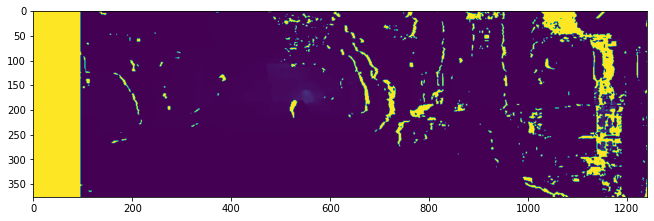

In [ ]:
depth = calc_depth_map(disp, k_left, t_left, t_right)
plt.figure(figsize=(11,7))
plt.imshow(depth);

In [ ]:
depth.max()

3861.447942459941

Max values derrived from our padding. 

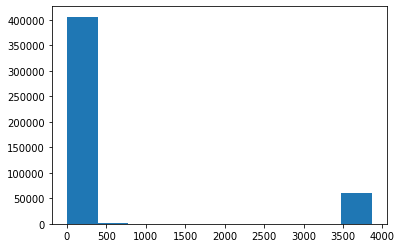

In [ ]:
plt.hist(depth.flatten());

We can see that there is a big gap between our real depth values and the erroneous max depth
where the stereo depth computation failed. This means that we can pick a depth of 3000 to
filter out any points that we consider in our feature matching, to make sure that we are
matching features that are within a reasonable distance from us that we have real depth
estimations for.

In [ ]:
for i, pixel in enumerate(depth[4]):
    if pixel < depth.max():
        print('First non-max value at index', i)
        break


First non-max value at index 96


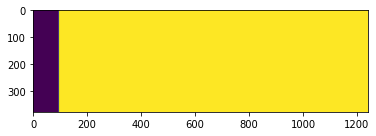

In [ ]:
# We can constuct a mask using this information like so
mask = np.zeros(handler.first_image_left.shape[:2], dtype=np.uint8)
ymax = handler.first_image_left.shape[0]
xmax = handler.first_image_left.shape[1]
cv2.rectangle(mask, (96,0), (xmax,ymax), (255), thickness = -1)
plt.imshow(mask);


**Final Function**

In [ ]:
def stereo_2_depth(img_left, img_right, P0, P1, matcher='bm', rgb=False, verbose=False, 
                   rectified=True):
    '''
    Takes stereo pair of images and returns a depth map for the left camera. If your projection
    matrices are not rectified, set rectified=False.
    
    Arguments:
    img_left -- image of left camera
    img_right -- image of right camera
    P0 -- Projection matrix for the left camera
    P1 -- Projection matrix for the right camera
    
    Optional Arguments:
    matcher -- (str) can be 'bm' for StereoBM or 'sgbm' for StereoSGBM
    rgb -- (bool) set to True if images passed are RGB. Default is False
    verbose -- (bool) set to True to report computation time and method
    rectified -- (bool) set to False if P1 not rectified to P0. Default is True
    
    Returns:
    depth -- depth map for left camera
    
    '''
    # Compute disparity map
    disp = compute_left_disparity_map(img_left, 
                                      img_right, 
                                      matcher=matcher, 
                                      rgb=rgb, 
                                      verbose=verbose)
    # Decompose projection matrices
    k_left, r_left, t_left = decompose_projection_matrix(P0)
    k_right, r_right, t_right = decompose_projection_matrix(P1)
    # Calculate depth map for left camera
    depth = calc_depth_map(disp, k_left, t_left, t_right)
    
    return depth

Time to compute disparity map using StereoBM: 0:00:00.059626


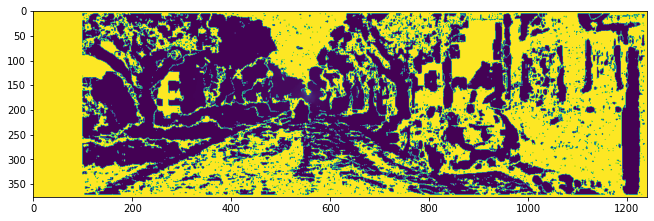

In [ ]:
depth = stereo_2_depth(handler.first_image_left,
                       handler.first_image_right,
                       handler.P0,
                       handler.P1, 
                        matcher='bm',
                                  verbose=True)
plt.figure(figsize=(11,7))
plt.imshow(depth);

# Feature Extraction

In [ ]:
def extract_features(image, detector='sift', mask=None):
    """
    Find keypoints and descriptors for the image

    Arguments:
    image -- a grayscale image

    Returns:
    kp -- list of the extracted keypoints (features) in an image
    des -- list of the keypoint descriptors in an image
    """
    if detector == 'sift':
        det = cv2.SIFT_create()
    elif detector == 'orb':
        det = cv2.ORB_create()
    elif detector == 'surf':
        det = cv2.xfeatures2d.SURF_create()
        
    kp, des = det.detectAndCompute(image, mask)
    
    return kp, des

In [ ]:
def match_features(des1, des2, matching='BF', detector='sift', sort=True, k=2):
    """
    Match features from two images

    Arguments:
    des1 -- list of the keypoint descriptors in the first image
    des2 -- list of the keypoint descriptors in the second image
    matching -- (str) can be 'BF' for Brute Force or 'FLANN'
    detector -- (str) can be 'sift or 'orb'. Default is 'sift'
    sort -- (bool) whether to sort matches by distance. Default is True
    k -- (int) number of neighbors to match to each feature.

    Returns:
    matches -- list of matched features from two images. Each match[i] is k or less matches for 
               the same query descriptor
    """
    if matching == 'BF':
        if detector == 'sift':
            matcher = cv2.BFMatcher_create(cv2.NORM_L2, crossCheck=False)
        elif detector == 'orb':
            matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING2, crossCheck=False)
        matches = matcher.knnMatch(des1, des2, k=k)
    elif matching == 'FLANN':
        FLANN_INDEX_KDTREE = 1
        index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees=5)
        search_params = dict(checks=50)
        matcher = cv2.FlannBasedMatcher(index_params, search_params)
        matches = matcher.knnMatch(des1, des2, k=k)
    
    if sort:
        matches = sorted(matches, key = lambda x:x[0].distance)

    return matches


The creator of SIFT, David Lowe, also proposed a ratio test to determine the level of distinctiveness of features. This test involves finding the two nearest neighbors in the second image to the descriptor of each feature in the first, then using the ratio of their distances from their matched feature to see whether the distance between that feature's descriptor and its closest match is significantly different than the distance to its second closest match. If it is not, then this implies that the feature is not highly distinct, since it is roughly equally similar to at least two features in the second image, and should therefore not be used for photogrammetric reconstruction of motion.

We can see an informative graphic relating the quality of matches according to this metric below:

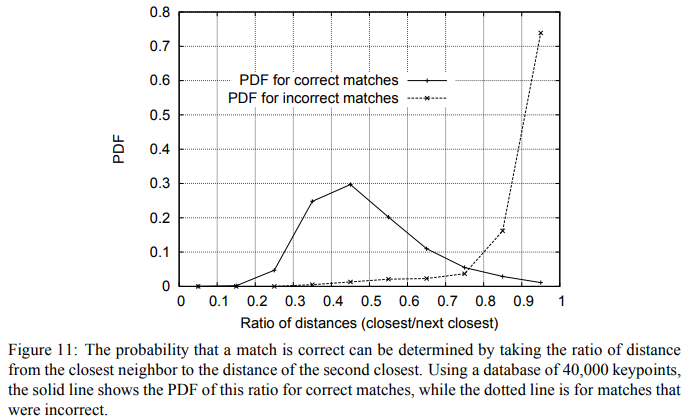

In [ ]:
def filter_matches_distance(matches, dist_threshold):
    """
    Filter matched features from two images by distance between the best matches

    Arguments:
    match -- list of matched features from two images
    dist_threshold -- maximum allowed relative distance between the best matches, (0.0, 1.0) 

    Returns:
    filtered_match -- list of good matches, satisfying the distance threshold
    """
    filtered_match = []
    for m, n in matches:
        if m.distance <= dist_threshold*n.distance:
            filtered_match.append(m)

    return filtered_match

In [ ]:
def visualize_matches(image1, kp1, image2, kp2, match):
    """
    Visualize corresponding matches in two images

    Arguments:
    image1 -- the first image in a matched image pair
    kp1 -- list of the keypoints in the first image
    image2 -- the second image in a matched image pair
    kp2 -- list of the keypoints in the second image
    match -- list of matched features from the pair of images

    Returns:
    image_matches -- an image showing the corresponding matches on both image1 and image2 or None if you don't use this function
    """
    image_matches = cv2.drawMatches(image1, kp1, image2, kp2, match, None, flags=2)
    plt.figure(figsize=(16, 6), dpi=100)
    plt.imshow(image_matches)


Time to compute disparity map using StereoSGBM: 0:00:00.129678
Number of matches before filtering: 3206
Number of matches after filtering: 446


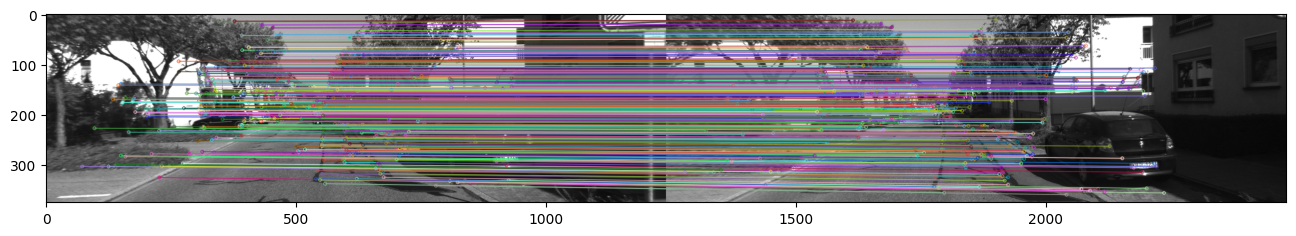

In [ ]:
# Look at matched points using sgbm matcher
image_left = handler.first_image_left
image_right = handler.first_image_right
image_plus1 = handler.second_image_left
depth = stereo_2_depth(image_left, 
                       image_right, 
                       handler.P0, 
                       handler.P1,
                       matcher='sgbm',
                       verbose=True)
kp0, des0 = extract_features(image_left, 'sift')
kp1, des1 = extract_features(image_plus1, 'sift')
matches = match_features(des0, des1, matching='BF', detector='sift', sort=True)
print('Number of matches before filtering:', len(matches))
matches = filter_matches_distance(matches, 0.3)
print('Number of matches after filtering:', len(matches))
visualize_matches(image_left, kp0, image_plus1, kp1, matches)

Time to compute disparity map using StereoBM: 0:00:00.044032
Number of matches before filtering: 3206
Number of matches after filtering: 446


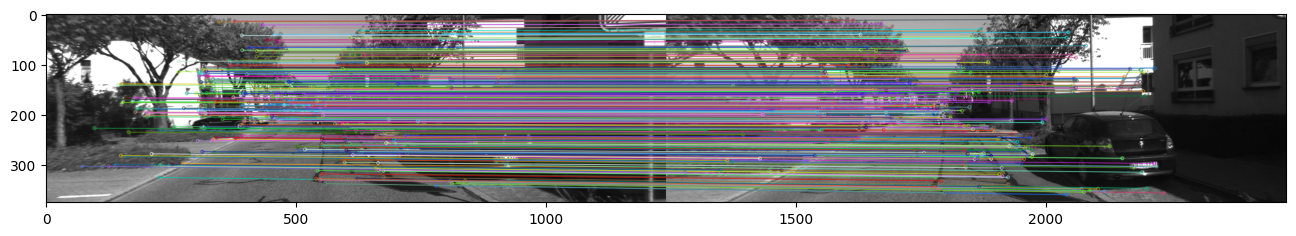

In [ ]:
# Now to see the difference with 'bm' matcher
image_left = handler.first_image_left
image_right = handler.first_image_right
image_plus1 = handler.second_image_left
depth = stereo_2_depth(image_left, 
                       image_right, 
                       handler.P0, 
                       handler.P1,
                       matcher='bm',
                       verbose=True)
kp0, des0 = extract_features(image_left, 'sift')
kp1, des1 = extract_features(image_plus1, 'sift')
matches = match_features(des0, des1, matching='BF', detector='sift', sort=True)
print('Number of matches before filtering:', len(matches))
matches = filter_matches_distance(matches, 0.3)
print('Number of matches after filtering:', len(matches))
visualize_matches(image_left, kp0, image_plus1, kp1, matches)


Time to compute disparity map using StereoBM: 0:00:00.046010
Number of matches before filtering: 500
Number of matches after filtering: 260


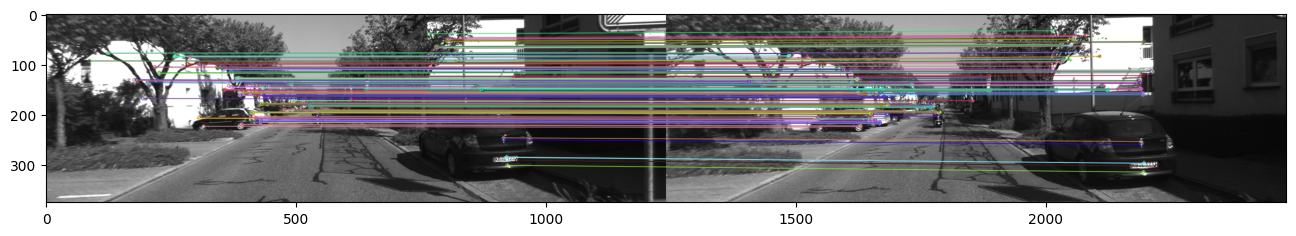

In [ ]:
# Now to see the difference with ORB descriptor
image_left = handler.first_image_left
image_right = handler.first_image_right
image_plus1 = handler.second_image_left
depth = stereo_2_depth(image_left, 
                       image_right, 
                       handler.P0, 
                       handler.P1,
                       matcher='bm',
                       verbose=True)
kp0, des0 = extract_features(image_left, 'orb')
kp1, des1 = extract_features(image_plus1, 'orb')
matches = match_features(des0, des1, matching='BF', detector='orb', sort=True)
print('Number of matches before filtering:', len(matches))
matches = filter_matches_distance(matches, 0.8)
print('Number of matches after filtering:', len(matches))
visualize_matches(image_left, kp0, image_plus1, kp1, matches)

# MOtion Estimation

In [ ]:
def estimate_motion(match, kp1, kp2, k, depth1=None, max_depth=3000):
    """
    Estimate camera motion from a pair of subsequent image frames

    Arguments:
    match -- list of matched features from the pair of images
    kp1 -- list of the keypoints in the first image
    kp2 -- list of the keypoints in the second image
    k -- camera intrinsic calibration matrix 
    
    Optional arguments:
    depth1 -- Depth map of the first frame. Set to None to use Essential Matrix decomposition
    max_depth -- Threshold of depth to ignore matched features. 3000 is default

    Returns:
    rmat -- estimated 3x3 rotation matrix
    tvec -- estimated 3x1 translation vector
    image1_points -- matched feature pixel coordinates in the first image. 
                     image1_points[i] = [u, v] -> pixel coordinates of i-th match
    image2_points -- matched feature pixel coordinates in the second image. 
                     image2_points[i] = [u, v] -> pixel coordinates of i-th match
               
    """
    rmat = np.eye(3)
    tvec = np.zeros((3, 1))
    
    image1_points = np.float32([kp1[m.queryIdx].pt for m in match])
    image2_points = np.float32([kp2[m.trainIdx].pt for m in match])

    if depth1 is not None:
        cx = k[0, 2]
        cy = k[1, 2]
        fx = k[0, 0]
        fy = k[1, 1]
        object_points = np.zeros((0, 3))
        delete = []

        # Extract depth information of query image at match points and build 3D positions
        for i, (u, v) in enumerate(image1_points):
            z = depth1[int(v), int(u)]
            # If the depth at the position of our matched feature is above 3000, then we
            # ignore this feature because we don't actually know the depth and it will throw
            # our calculations off. We add its index to a list of coordinates to delete from our
            # keypoint lists, and continue the loop. After the loop, we remove these indices
            if z > max_depth:
                delete.append(i)
                continue
                
            # Use arithmetic to extract x and y (faster than using inverse of k)
            x = z*(u-cx)/fx
            y = z*(v-cy)/fy
            object_points = np.vstack([object_points, np.array([x, y, z])])
            #Below is the same but slow version
            #object_points = np.vstack([object_points, np.linalg.inv(k).dot(z*np.array([u, v, 1]))])

        image1_points = np.delete(image1_points, delete, 0)
        image2_points = np.delete(image2_points, delete, 0)
        
        # Use PnP algorithm with RANSAC for robustness to outliers
        _, rvec, tvec, inliers = cv2.solvePnPRansac(object_points, image2_points, k, None)
        #print('Number of inliers: {}/{} matched features'.format(len(inliers), len(match)))
        
        # Above function returns axis angle rotation representation rvec, use Rodrigues formula
        # to convert this to our desired format of a 3x3 rotation matrix
        rmat = cv2.Rodrigues(rvec)[0]
    
    else:
        # With no depth provided, use essential matrix decomposition instead. This is not really
        # very useful, since you will get a 3D motion tracking but the scale will be ambiguous
        image1_points_hom = np.hstack([image1_points, np.ones(len(image1_points)).reshape(-1,1)])
        image2_points_hom = np.hstack([image2_points, np.ones(len(image2_points)).reshape(-1,1)])
        E = cv2.findEssentialMat(image1_points, image2_points, k)[0]
        _, rmat, tvec, mask = cv2.recoverPose(E, image1_points, image2_points, k)
    
    return rmat, tvec, image1_points, image2_points

# Visual Odometry

In [ ]:
def visual_odometry(handler, detector='sift', matching='BF', filter_match_distance=None, 
                    stereo_matcher='bm', mask=None, depth_type='stereo', subset=None,
                    plot=False):
    '''
    Function to perform visual odometry on a sequence from the KITTI visual odometry dataset.
    Takes as input a Data_Handler object and optional parameters.
    
    Arguments:
    handler -- Data_Handler object instance
    
    Optional Arguments:
    detector -- (str) can be 'sift' or 'orb'. Default is 'sift'.
    matching -- (str) can be 'BF' for Brute Force or 'FLANN'. Default is 'BF'.
    filter_match_distance -- (float) value for ratio test on matched features. Default is None.
    stereo_matcher -- (str) can be 'bm' (faster) or 'sgbm' (more accurate). Default is 'bm'.
    mask -- (array) mask to reduce feature search area to where depth information available.
    depth_type -- (str) can be 'stereo' or set to None to use Essential matrix decomposition.
                        Note that scale will be incorrect with no depth used.
    subset -- (int) number of frames to compute. Defaults to None to compute all frames.
    plot -- (bool) whether to plot the estimated vs ground truth trajectory. Only works if
                   matplotlib is set to tk mode. Default is False.
    
    Returns:
    trajectory -- Array of shape Nx3x4 of estimated poses of vehicle for each computed frame.
    
    '''
    
    # Report methods being used to user
    print('Generating disparities with Stereo{}'.format(str.upper(stereo_matcher)))
    print('Detecting features with {} and matching with {}'.format(str.upper(detector), 
                                                                   matching))
    if filter_match_distance is not None:
        print('Filtering feature matches at threshold of {}*distance'.format(filter_match_distance))
    
    if subset is not None:
        #subset = subset + 1
        num_frames = subset
    else:
        # Set num_frames to one less than the number of frames so we have sequential images
        # in the last frame run.
        num_frames = handler.num_frames
        
    if plot:
        fig = plt.figure(figsize=(14, 14))
        ax = fig.add_subplot(projection='3d')
        ax.view_init(elev=-20, azim=270)
        xs = handler.gt[:, 0, 3]
        ys = handler.gt[:, 1, 3]
        zs = handler.gt[:, 2, 3]
        ax.set_box_aspect((np.ptp(xs), np.ptp(ys), np.ptp(zs)))
        ax.plot(xs, ys, zs, c='k')
        
    # Establish homogeneous transformation matrix. First pose is identity    
    T_tot = np.eye(4)
    trajectory = np.zeros((num_frames, 3, 4))
    trajectory[0] = T_tot[:3, :]
    imheight = handler.imheight
    imwidth = handler.imwidth
    
    # Decompose left camera projection matrix to get intrinsic k matrix
    k_left, r_left, t_left = decompose_projection_matrix(handler.P0)
    
    if handler.low_memory:
        handler.reset_frames()
        image_plus1 = next(handler.images_left)
    
    # Iterate through all frames of the sequence
    for i in range(num_frames - 1):
        # Stop if we've reached the second to last frame, since we need two sequential frames
        #if i == num_frames - 1:
        #    break
        # Start timer for frame
        start = datetime.datetime.now()
        # Get our stereo images for depth estimation
        if handler.low_memory:
            image_left = image_plus1
            image_right = next(handler.images_right)
            # Get next frame in the left camera for visual odometry
            image_plus1 = next(handler.images_left)
        else:
            image_left = handler.images_left[i]
            image_right = handler.images_right[i]
            # Get next frame in the left camera for visual odometry
            image_plus1 = handler.images_left[i+1]
        
        # Estimate depth if using stereo depth estimation (recommended)
        if depth_type == 'stereo':
            depth = stereo_2_depth(image_left, 
                                   image_right, 
                                   P0=handler.P0, 
                                   P1=handler.P1,
                                   matcher=stereo_matcher)
        # Otherwise use Essential Matrix decomposition (ambiguous scale)
        else:
            depth = None
            
        
            
        # Get keypoints and descriptors for left camera image of two sequential frames
        kp0, des0 = extract_features(image_left, detector, mask)
        kp1, des1 = extract_features(image_plus1, detector, mask)
        
        # Get matches between features detected in the two images
        matches_unfilt = match_features(des0, 
                                        des1, 
                                        matching=matching, 
                                        detector=detector, 
                                        sort=True)
        
        # Filter matches if a distance threshold is provided by user
        if filter_match_distance is not None:
            matches = filter_matches_distance(matches_unfilt, filter_match_distance)
        else:
            matches = matches_unfilt
            
        # Estimate motion between sequential images of the left camera
        rmat, tvec, img1_points, img2_points = estimate_motion(matches, kp0, kp1, k_left, depth)
        
        # The following code is commented out because it is only necessary if you intend to
        # use very low distance ratios for match filtering. Feel free to uncomment and try
        # out using very low distance ratios, but if you do, comment out the above line.
        # Try to get motion with filter distance, if not increase threshold until success
        #try:
        #    rmat, tvec, img1_points, img2_points = estimate_motion(matches, 
        #                                                           kp0, 
        #                                                           kp1, 
        #                                                           k_left, 
        #                                                           depth)
        #except:
        #    filt_inc = 0.1
        #    while True:
        #        print('Not enough features after filter with threshold {},'.format(filter_match_distance),
        #              'raising threshold to {} until next frame.'.format(filter_match_distance + filt_inc)) 
        #        try:
        #            matches = filter_matches_distance(matches_unfilt, filter_match_distance+filt_inc)
        #            rmat, tvec, img1_points, img2_points = estimate_motion(matches, 
        #                                                                   kp0, 
        #                                                                   kp1, 
        #                                                                   k_left, 
        #                                                                   depth)
        #            break
        #        except:
        #            filt_inc += 0.1
        #            continue
                  
        # Create blank homogeneous transformation matrix
        Tmat = np.eye(4)
        # Place resulting rotation matrix  and translation vector in their proper locations
        # in homogeneous T matrix
        Tmat[:3, :3] = rmat
        Tmat[:3, 3] = tvec.T
        

        #Please refer to https://docs.opencv.org/4.x/d5/d1f/calib3d_solvePnP.html 
        # The SolvePnPRansac() function computes a pose that relates points in the global
        # coordinate frame to the camera's pose. We used the camera's pose in the first image
        # as the global coordinate frame, reconstruct 3D positions of the features in the
        # image using stereo depth estimation, then find a pose which relates the camera in
        # the next frame to those 3D points. When tracking the vehicle pose over time, what we
        # actually want is to relate the points in the camera's coordinate frame to the global
        # frame, so we want the opposite (inverse) of the transformation matrix provided to us
        # by the SolvePnPRansac function. Recall from the earlier discussion that we can find
        # the inverse of a transformation matrix by making it homogeneous by adding a row of
        # (0, 0, 0, 1) to it, then taking its inverse. Further, we are tracking the vehicle
        # motion from the very first camera pose, so we need the cumulative product of the
        # inverses of each estimated camera pose given to us by SolvePnPRansac. Thus, below
        # we iteratively multiply the T_tot homogeneous transformation matrix that we 
        # instantiated before the for loop by the inverse of each successive pose we estimate,
        # and save its current values into our estimated poses at an index corresponding to our
        # current frame. This way, the transformation matrix at each index will be one that
        # relates 3D homogeneous coordinates in the camera's frame to the global coordinate
        # frame, which is the coordinate frame of the camera's first position. The translation
        # vector component of this transformation matrix will describe where the camera's curent
        # origin is in this global referece frame.
        T_tot = T_tot.dot(np.linalg.inv(Tmat))
            
        # Place pose estimate in i+1 to correspond to the second image, which we estimated for
        trajectory[i+1, :, :] = T_tot[:3, :]
        # End the timer for the frame and report frame rate to user
        end = datetime.datetime.now()
        print('Time to compute frame {}:'.format(i+1), end-start)
        
        if plot:
            xs = trajectory[:i+2, 0, 3]
            ys = trajectory[:i+2, 1, 3]
            zs = trajectory[:i+2, 2, 3]
            plt.plot(xs, ys, zs, c='chartreuse')
            plt.pause(1e-32)
            
    if plot:        
        plt.close()
        
    return trajectory

#Error Calculator

In [ ]:
def calculate_error(ground_truth, estimated, error_type='mse'):
    '''
    Takes arrays of ground truth and estimated poses of shape Nx3x4, and computes error using
    Euclidean distance between true and estimated 3D coordinate at each position.
    
    Arguments:
    ground_truth -- Nx3x4 array of ground truth poses
    estimated -- Nx3x4 array of estimated poses
    
    Optional Arguments:
    error_type -- (str) can be 'mae', 'mse', 'rmse', or 'all' to return dictionary of all 3
    
    Returns:
    error -- either a float or dictionary of error types and float values
    
    '''
    # Find the number of frames in the estimated trajectory to compare with
    nframes_est = estimated.shape[0]
    
    def get_mse(ground_truth, estimated):
        se = np.sqrt((ground_truth[:nframes_est, 0, 3] - estimated[:, 0, 3])**2 
                    + (ground_truth[:nframes_est, 1, 3] - estimated[:, 1, 3])**2 
                    + (ground_truth[:nframes_est, 2, 3] - estimated[:, 2, 3])**2)**2
        mse = se.mean()
        return mse
    
    def get_mae(ground_truth, estimated):
        ae = np.sqrt((ground_truth[:nframes_est, 0, 3] - estimated[:, 0, 3])**2 
                    + (ground_truth[:nframes_est, 1, 3] - estimated[:, 1, 3])**2 
                    + (ground_truth[:nframes_est, 2, 3] - estimated[:, 2, 3])**2)
        mae = ae.mean()
        return mae
    
    if error_type == 'mae':
        return get_mae(ground_truth, estimated)
    elif error_type == 'mse':
        return get_mse(ground_truth, estimated)
    elif error_type == 'rmse':
        return np.sqrt(get_mse(ground_truth, estimated))
    elif error_type == 'all':
        mae = get_mae(ground_truth, estimated)
        mse = get_mse(ground_truth, estimated)
        rmse = np.sqrt(mse)
        return {'mae': mae,
                'rmse': rmse,
                'mse': mse}


#A sample result>

In [ ]:
start = datetime.datetime.now()
trajectory_nolidar_bm = visual_odometry(handler,
                                        filter_match_distance=0.5, 
                                        detector='sift',
                                        #matching='FLANN',
                                        stereo_matcher='bm',
                                        mask=mask,     
                                        subset=None)
end = datetime.datetime.now()
print('Time to perform odometry:', end-start)


Generating disparities with StereoBM
Detecting features with SIFT and matching with BF
Filtering feature matches at threshold of 0.5*distance
Time to compute frame 1: 0:00:01.268404
Time to compute frame 2: 0:00:00.946573
Time to compute frame 3: 0:00:00.818321
Time to compute frame 4: 0:00:00.868208
Time to compute frame 5: 0:00:00.856208
Time to compute frame 6: 0:00:00.873249
Time to compute frame 7: 0:00:00.868206
Time to compute frame 8: 0:00:00.931008
Time to compute frame 9: 0:00:00.811029
Time to compute frame 10: 0:00:00.791238
Time to compute frame 11: 0:00:00.782899
Time to compute frame 12: 0:00:00.797948
Time to compute frame 13: 0:00:00.794210
Time to compute frame 14: 0:00:00.696188
Time to compute frame 15: 0:00:00.660399
Time to compute frame 16: 0:00:00.664566
Time to compute frame 17: 0:00:00.660231
Time to compute frame 18: 0:00:00.719270
Time to compute frame 19: 0:00:00.745155
Time to compute frame 20: 0:00:00.756305
Time to compute frame 21: 0:00:00.802938
Time t

**Plot Trajectory**

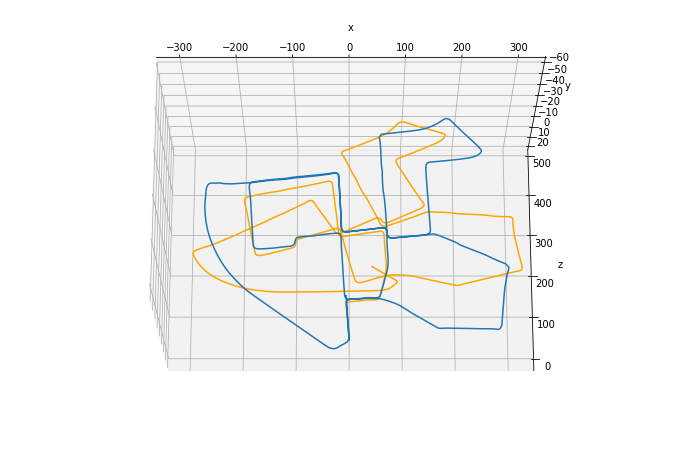

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(trajectory_nolidar_bm[:, :, 3][:, 0], 
        trajectory_nolidar_bm[:, :, 3][:, 1], 
        trajectory_nolidar_bm[:, :, 3][:, 2], label='estimated', color='orange')

ax.plot(handler.gt[:, :, 3][:, 0], 
        handler.gt[:, :, 3][:, 1], 
        handler.gt[:, :, 3][:, 2], label='ground truth')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(elev=-20, azim=270)

In [ ]:
calculate_error(handler.gt, trajectory_nolidar_bm, 'all')

{'mae': 45.918495280067866,
 'rmse': 58.001489831760715,
 'mse': 3364.1728227038416}

In [ ]:
handler.gt.shape

(4541, 3, 4)